In [34]:
# !pip install easyocr
# !pip install scikit-learn

In [35]:
import logging
import cv2
import matplotlib.pyplot as plt
import easyocr
import re
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

In [36]:
image_path = '062.jpg'

# Lista de textos reais das placas (ground truth)
true_plates = ['LUF4444']

In [37]:
# Função para corrigir 'O' para '0' e 'i', 'l', '|' para '1' quando necessário
def correct_plate_text(text):
    # Converte o texto para maiúsculas
    text = text.upper()
    text = list(text)

    for i, char in enumerate(text):
        # Substituir 'O' por '0' em posições onde um número é esperado (3ª posição para placas antigas ou após números)
        if char == 'O':
            if i == 3 or (i >= 4 and text[i-1].isdigit()):  # Posição para placas antigas
                text[i] = '0'

        # Substituir 'i', 'l', '|' por '1' na 6ª posição das novas placas (ABC1D23)
        if i == 5 and char in ['I', 'L', '|']:
            text[i] = '1'

    return ''.join(text)

In [38]:
# Função para calcular a média de confiança
def calculate_average_confidence(results):
    total_confidence = 0
    for result in results:
        _, _, prob = result
        total_confidence += prob
    # A média de confiança é a soma de todas as confianças dividida pelo número de detecções
    return (total_confidence / len(results)) * 100 if results else 0

In [39]:
def text_replace(text):
    text = text.replace(" ", "")
    text = text.replace("-", "")
    text = text.replace("*", "")
    text = text.replace("]", "")
    text = text.replace("/", "")
    text = text.replace("[", "")
    text = text.replace(",", "")
    text = text.replace("'", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace(":", "")
    text = text.replace("|", "")
    text = text.replace(".", "")
    text = text.replace("{", "")
    text = text.replace("}", "")

    return text.upper()



## Nenhuma Tratativa

LUF4444


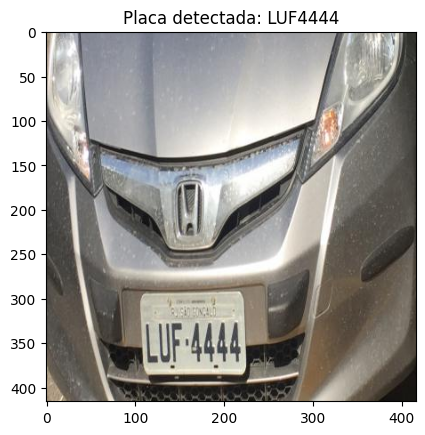

Placa com maior confiança: LUF4444
Maior confiança: 30.44%
Confiança média: 30.44%
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-score: 1.00
Tempo total de execução: 14.74 segundos


In [40]:
start_time = time.time()

predicted_plates = []

# Configurar o logger do easyocr para ignorar avisos
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])

# Carregar a imagem
image = cv2.imread(image_path)

# Aplicar OCR na imagem aprimorada
results = reader.readtext(image)

# Definir padrões de placas brasileiras antigas e novas
plate_pattern_old = r'^[A-Za-z]{3}\d{4}$'  # ABC1234
plate_pattern_new = r'^[A-Za-z]{3}\d{1}[A-Za-z]{1}\d{2}$'  # ABC1D23

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Iterar sobre os resultados e aplicar a regex
for (bbox, text, prob) in results:
    text = text_replace(text)

    print(text)
    # Corrigir o texto detectado substituindo 'O' por '0' quando apropriado
    corrected_text = correct_plate_text(text)

    predicted_plates.append(corrected_text)

    # Verificar se a placa segue o padrão antigo ou novo
    if re.match(plate_pattern_old, corrected_text) or re.match(plate_pattern_new, corrected_text):
        # Mostrar a imagem com a placa detectada
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Placa detectada: {corrected_text}")
        plt.show()

    # Atualizar a placa com a maior confiança
    if prob > best_confidence:
        best_confidence = prob
        best_detected_plate = corrected_text

# Exibir a média de confiança e a melhor placa detectada
average_confidence = calculate_average_confidence(results)
print(f"Placa com maior confiança: {best_detected_plate}")
print(f"Maior confiança: {best_confidence * 100:.2f}%")
print(f"Confiança média: {average_confidence:.2f}%")


try:
  # Comparar previsões com as placas reais para calcular as métricas
  accuracy = accuracy_score(true_plates, predicted_plates)
  precision = precision_score(true_plates, predicted_plates, average='weighted', zero_division=0)
  recall = recall_score(true_plates, predicted_plates, average='weighted', zero_division=0)
  f1 = f1_score(true_plates, predicted_plates, average='weighted', zero_division=0)

  # Exibir as métricas
  print(f"Acurácia: {accuracy:.2f}")
  print(f"Precisão: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1-score: {f1:.2f}")
except:
    pass

# Registrar o fim do tempo de execução
end_time = time.time()

# Calcular e exibir o tempo total de execução
execution_time = end_time - start_time
print(f"Tempo total de execução: {execution_time:.2f} segundos")

## Escala de Cinza

In [41]:
start_time = time.time()

predicted_plates = []

# Configurar o logger do easyocr para ignorar avisos
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])

# Carregar a imagem
image = cv2.imread(image_path)

# Converter para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar OCR na imagem aprimorada
results = reader.readtext(gray)

# Definir padrões de placas brasileiras antigas e novas
plate_pattern_old = r'^[A-Za-z]{3}\d{4}$'  # ABC1234
plate_pattern_new = r'^[A-Za-z]{3}\d{1}[A-Za-z]{1}\d{2}$'  # ABC1D23

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Iterar sobre os resultados e aplicar a regex
for (bbox, text, prob) in results:
    text = text_replace(text)

    # Corrigir o texto detectado substituindo 'O' por '0' quando apropriado
    corrected_text = correct_plate_text(text)
    print(text)

    predicted_plates.append(corrected_text)

    # Verificar se a placa segue o padrão antigo ou novo
    if re.match(plate_pattern_old, corrected_text) or re.match(plate_pattern_new, corrected_text):
        # Mostrar a imagem com a placa detectada
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        plt.title(f"Placa detectada: {corrected_text}")
        plt.show()

    # Atualizar a placa com a maior confiança
    if prob > best_confidence:
        best_confidence = prob
        best_detected_plate = corrected_text

# Exibir a média de confiança e a melhor placa detectada
average_confidence = calculate_average_confidence(results)
print(f"Placa com maior confiança: {best_detected_plate}")
print(f"Maior confiança: {best_confidence * 100:.2f}%")
print(f"Confiança média: {average_confidence:.2f}%")

try:
    # Comparar previsões com as placas reais para calcular as métricas
    accuracy = accuracy_score(true_plates, predicted_plates)
    precision = precision_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    recall = recall_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    f1 = f1_score(true_plates, predicted_plates, average='weighted', zero_division=0)

    # Exibir as métricas
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
except:
    pass

# Registrar o fim do tempo de execução
end_time = time.time()

# Calcular e exibir o tempo total de execução
execution_time = end_time - start_time
print(f"Tempo total de execução: {execution_time:.2f} segundos")

ILUF4444
Placa com maior confiança: ILUF4444
Maior confiança: 11.14%
Confiança média: 11.14%
Acurácia: 0.00
Precisão: 0.00
Recall: 0.00
F1-score: 0.00
Tempo total de execução: 7.02 segundos


## CLAHE em RGB

LUF4444


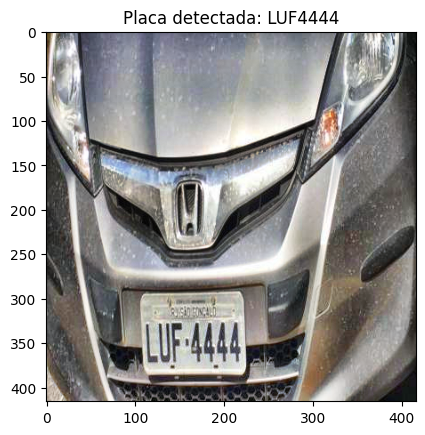

Placa com maior confiança: LUF4444
Maior confiança: 27.27%
Confiança média: 27.27%
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-score: 1.00
Tempo total de execução: 6.88 segundos


In [42]:
start_time = time.time()

predicted_plates = []

# Configurar o logger do easyocr para ignorar avisos
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])

# Carregar a imagem
image = cv2.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem. Verifique o caminho do arquivo.")
    exit()

# Aplicar o CLAHE em cada canal da imagem BGR
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Dividir a imagem nos três canais BGR
b, g, r = cv2.split(image)

# Aplicar CLAHE em cada canal
b_clahe = clahe.apply(b)
g_clahe = clahe.apply(g)
r_clahe = clahe.apply(r)

# Recompor a imagem com os canais CLAHE aplicados
enhanced_image = cv2.merge((b_clahe, g_clahe, r_clahe))

# Aplicar OCR na imagem aprimorada
results = reader.readtext(enhanced_image)

# Definir padrões de placas brasileiras antigas e novas
plate_pattern_old = r'^[A-Za-z]{3}\d{4}$'  # ABC1234
plate_pattern_new = r'^[A-Za-z]{3}\d{1}[A-Za-z]{1}\d{2}$'  # ABC1D23

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Iterar sobre os resultados e aplicar a regex
for (bbox, text, prob) in results:
    text = text_replace(text)

    print(text)

    # Corrigir o texto detectado substituindo 'O' por '0' quando apropriado
    corrected_text = correct_plate_text(text)

    predicted_plates.append(corrected_text)

    # Verificar se a placa segue o padrão antigo ou novo
    if re.match(plate_pattern_old, corrected_text) or re.match(plate_pattern_new, corrected_text):
        # Mostrar a imagem com a placa detectada
        plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Placa detectada: {corrected_text}")
        plt.show()

    # Atualizar a placa com a maior confiança
    if prob > best_confidence:
        best_confidence = prob
        best_detected_plate = corrected_text

# Exibir a média de confiança e a melhor placa detectada
average_confidence = calculate_average_confidence(results)
print(f"Placa com maior confiança: {best_detected_plate}")
print(f"Maior confiança: {best_confidence * 100:.2f}%")
print(f"Confiança média: {average_confidence:.2f}%")

try:
    # Comparar previsões com as placas reais para calcular as métricas
    accuracy = accuracy_score(true_plates, predicted_plates)
    precision = precision_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    recall = recall_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    f1 = f1_score(true_plates, predicted_plates, average='weighted', zero_division=0)

    # Exibir as métricas
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
except:
    pass

# Registrar o fim do tempo de execução
end_time = time.time()

# Calcular e exibir o tempo total de execução
execution_time = end_time - start_time
print(f"Tempo total de execução: {execution_time:.2f} segundos")

## Filtro Bilateral

In [43]:
start_time = time.time()

predicted_plates = []

# Configurar o logger do easyocr para ignorar avisos
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])

# Carregar a imagem
image = cv2.imread(image_path)

# Aplicar filtro bilateral para preservar bordas
bilateral = cv2.bilateralFilter(image, 11, 17, 17)

# Aplicar OCR na imagem aprimorada
results = reader.readtext(bilateral)

# Definir padrões de placas brasileiras antigas e novas
plate_pattern_old = r'^[A-Za-z]{3}\d{4}$'  # ABC1234
plate_pattern_new = r'^[A-Za-z]{3}\d{1}[A-Za-z]{1}\d{2}$'  # ABC1D23

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Iterar sobre os resultados e aplicar a regex
for (bbox, text, prob) in results:
    text = text_replace(text)

    print(text)

    # Corrigir o texto detectado substituindo 'O' por '0' quando apropriado
    corrected_text = correct_plate_text(text)
    predicted_plates.append(corrected_text)

    # Verificar se a placa segue o padrão antigo ou novo
    if re.match(plate_pattern_old, corrected_text) or re.match(plate_pattern_new, corrected_text):
        # Mostrar a imagem com a placa detectada
        plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
        plt.title(f"Placa detectada: {corrected_text}")
        plt.show()

    # Atualizar a placa com a maior confiança
    if prob > best_confidence:
        best_confidence = prob
        best_detected_plate = corrected_text

# Exibir a média de confiança e a melhor placa detectada
average_confidence = calculate_average_confidence(results)
print(f"Placa com maior confiança: {best_detected_plate}")
print(f"Maior confiança: {best_confidence * 100:.2f}%")
print(f"Confiança média: {average_confidence:.2f}%")

try:
    # Comparar previsões com as placas reais para calcular as métricas
    accuracy = accuracy_score(true_plates, predicted_plates)
    precision = precision_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    recall = recall_score(true_plates, predicted_plates, average='weighted', zero_division=0)
    f1 = f1_score(true_plates, predicted_plates, average='weighted', zero_division=0)

    # Exibir as métricas
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
except:
    pass

# Registrar o fim do tempo de execução
end_time = time.time()

# Calcular e exibir o tempo total de execução
execution_time = end_time - start_time
print(f"Tempo total de execução: {execution_time:.2f} segundos")


ILUF4444
Placa com maior confiança: ILUF4444
Maior confiança: 14.13%
Confiança média: 14.13%
Acurácia: 0.00
Precisão: 0.00
Recall: 0.00
F1-score: 0.00
Tempo total de execução: 7.90 segundos


## Todos Juntos

[([[105, 321], [229, 321], [229, 381], [105, 381]], 'LUF 4444}', 0.2490123086646948)]
LUF4444


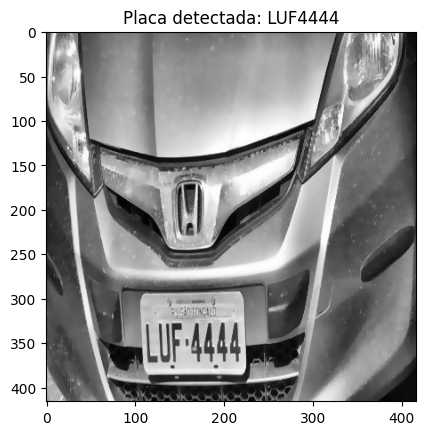

Placa com maior confiança: LUF4444
Maior confiança: 24.90%
Confiança média: 24.90%
Acurácia: 0.00
Precisão: 0.00
Recall: 0.00
F1-score: 0.00
Tempo total de execução: 6.71 segundos


In [44]:
start_time = time.time()

predicted_plates = []

# Configurar o logger do easyocr para ignorar avisos
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])

# Carregar a imagem
image = cv2.imread(image_path)

# Converter para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar o CLAHE (Equalização adaptativa do histograma) para melhorar o contraste
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
enhanced_image = clahe.apply(gray)

# Aplicar filtro bilateral para preservar bordas
bilateral = cv2.bilateralFilter(enhanced_image, 9, 15, 15)

# Aplicar OCR na imagem aprimorada
results = reader.readtext(bilateral)

print(results)

# Definir padrões de placas brasileiras antigas e novas
plate_pattern_old = r'^[A-Za-z]{3}\d{4}$'  # ABC1234
plate_pattern_new = r'^[A-Za-z]{3}\d{1}[A-Za-z]{1}\d{2}$'  # ABC1D23

# Variável para armazenar a melhor placa detectada
best_detected_plate = ""
best_confidence = 0

# Iterar sobre os resultados e aplicar a regex
for (bbox, text, prob) in results:
    text = text_replace(text)

    print(text)

    # Corrigir o texto detectado substituindo 'O' por '0' quando apropriado
    corrected_text = correct_plate_text(text)

    predicted_plates.append(corrected_text)

    # Verificar se a placa segue o padrão antigo ou novo
    if re.match(plate_pattern_old, corrected_text) or re.match(plate_pattern_new, corrected_text):
        # Mostrar a imagem em escala de cinza, já que estamos processando em grayscale
        plt.imshow(bilateral, cmap='gray')
        plt.title(f"Placa detectada: {corrected_text}")
        plt.show()

    # Atualizar a placa com a maior confiança
    if prob > best_confidence:
        best_confidence = prob
        best_detected_plate = corrected_text

try:
    # Exibir a média de confiança e a melhor placa detectada
    average_confidence = calculate_average_confidence(results)
    print(f"Placa com maior confiança: {best_detected_plate}")
    print(f"Maior confiança: {best_confidence * 100:.2f}%")
    print(f"Confiança média: {average_confidence:.2f}%")

    # Exibir as métricas
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
except:
    pass

# Registrar o fim do tempo de execução
end_time = time.time()

# Calcular e exibir o tempo total de execução
execution_time = end_time - start_time
print(f"Tempo total de execução: {execution_time:.2f} segundos")